In [ ]:
# Langkah 1: Mengunggah File
from google.colab import files

# Langkah 2: Membaca File Excel
import pandas as pd

# Pastikan nama file sesuai dengan file yang diunggah
file_name = '/content/kidney_disease (1).csv'
data = pd.read_csv(file_name)

# Langkah 3: Melihat Struktur dataset
# Menampilkan lima baris pertama
print(data.head())

# Melihat nama-nama kolom
print("Kolom dalam dataset:")
print(data.columns)

# Melihat informasi umum dataset
print("Info dataset:")
print(data.info())


   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]
Kolom dalam dataset:
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc'

In [ ]:
# Menghapus baris yang nilai kolom 'classification'-nya adalah 'ckd\t '
data = data[data['classification'] != 'ckd\t']


Distribusi nilai classification:
classification
ckd       248
notckd    150
Name: count, dtype: int64


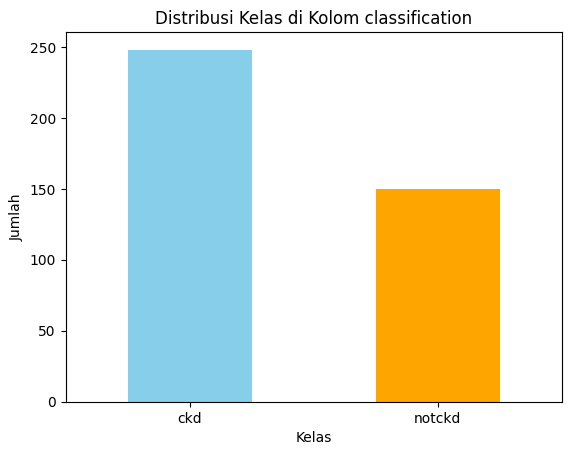

In [ ]:

print("Distribusi nilai classification:")
print(data['classification'].value_counts())

import matplotlib.pyplot as plt


data['classification'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribusi Kelas di Kolom classification')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# 🔹 1️⃣ Pisahkan Fitur dan Target
X = data.drop(columns=['id', 'classification'])  # Fitur (kecuali kolom target dan ID)
y = data['classification']  # Target kolom

# 🔹 2️⃣ Pisahkan data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 3️⃣ Cek hasil pembagian
print(f"Jumlah data training: {X_train.shape[0]} data")
print(f"Jumlah data testing: {X_test.shape[0]} data")


Jumlah data training: 318 data
Jumlah data testing: 80 data


In [ ]:
# Pilih kolom yang ada dalam dataset untuk fitur
X = data[['age', 'bp', 'bgr', 'bu', 'sc', 'rbc', 'htn', 'dm', 'cad']]
# Pisahkan target kolom
y = data['classification']


# 🔹 2️⃣ Pisahkan data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 3️⃣ Handle missing values untuk data train
# Ubah semua kolom object yang bisa jadi angka menjadi float
numeric_obj_cols = ['rbc']  # Kolom yang mungkin memiliki nilai string yang perlu diubah menjadi angka

# Mengubah kolom yang memiliki nilai numerik dari tipe 'object' menjadi 'float'
for col in numeric_obj_cols:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Isi missing values untuk X_train: mean untuk numerik, modus untuk kategorikal
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    else:
        X_train[col] = X_train[col].fillna(X_train[col].mean())

# 🔹 4️⃣ Handle missing values untuk data test
# Ubah semua kolom object yang bisa jadi angka menjadi float
for col in numeric_obj_cols:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Isi missing values untuk X_test: mean untuk numerik, modus untuk kategorikal
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])
    else:
        X_test[col] = X_test[col].fillna(X_test[col].mean())

In [ ]:
# Cek kolom yang tersedia dalam data
print(X.columns)


Index(['age', 'bp', 'bgr', 'bu', 'sc', 'rbc', 'htn', 'dm', 'cad'], dtype='object')


# MASUK XGBOOST

In [ ]:
%pip uninstall xgboost -y
%pip install xgboost
import xgboost
print(xgboost.__version__)
from xgboost import XGBClassifier

# Mengecek apakah XGBClassifier dapat diakses
print(XGBClassifier)


Found existing installation: xgboost 3.0.0
Uninstalling xgboost-3.0.0:
  Successfully uninstalled xgboost-3.0.0
  Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl (253.9 MB)
3.0.0
<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [ ]:
print(y_train.value_counts())

classification
ckd       196
notckd    122
Name: count, dtype: int64


In [ ]:
print(X_train.isna().sum())  # Cek kolom dengan nilai NaN di X_train
print(y_train.isna().sum())  # Cek nilai NaN di y_train
print(X_train.dtypes)  # Pastikan semua kolom memiliki tipe data yang sesuai


age      0
bp       0
bgr      0
bu       0
sc       0
rbc    318
htn      0
dm       0
cad      0
dtype: int64
0
age    float64
bp     float64
bgr    float64
bu     float64
sc     float64
rbc    float64
htn     object
dm      object
cad     object
dtype: object


In [ ]:
# Mengubah kolom menjadi tipe data string sebelum memprosesnya
X_train['htn'] = X_train['htn'].astype(str).str.strip().str.lower()
X_test['htn'] = X_test['htn'].astype(str).str.strip().str.lower()

X_train['dm'] = X_train['dm'].astype(str).str.strip().str.lower()
X_test['dm'] = X_test['dm'].astype(str).str.strip().str.lower()

X_train['cad'] = X_train['cad'].astype(str).str.strip().str.lower()
X_test['cad'] = X_test['cad'].astype(str).str.strip().str.lower()


In [ ]:
print(y_train.unique())  # Untuk melihat label yang ada dalam y_train


['ckd' 'notckd']


In [ ]:
print(y_train_encoded)  # Menampilkan 10 nilai pertama setelah encoding


[0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0]


In [ ]:
# Ubah kolom 'dm' dan 'cad' menjadi numerik
X_train['dm'] = X_train['dm'].replace({'yes': 1, 'no': 0})
X_test['dm'] = X_test['dm'].replace({'yes': 1, 'no': 0})

X_train['cad'] = X_train['cad'].replace({'yes': 1, 'no': 0})
X_test['cad'] = X_test['cad'].replace({'yes': 1, 'no': 0})

# Pastikan perubahan diterapkan
print(X_train[['dm', 'cad']].head())
print(X_test[['dm', 'cad']].head())


     dm  cad
3     0    0
18    1    1
378   0    0
250   0    0
178   0    0
     dm  cad
199   0    1
398   0    0
33    0    0
209   0    0
94    1    0


<ipython-input-109-b9fbbb390a7b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['dm'] = X_train['dm'].replace({'yes': 1, 'no': 0})
<ipython-input-109-b9fbbb390a7b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['dm'] = X_test['dm'].replace({'yes': 1, 'no': 0})
<ipython-input-109-b9fbbb390a7b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, se

In [ ]:
X_test

,age,bp,bgr,bu,sc,rbc,htn,dm,cad
199,65.0,80.0,92.000000,37.000000,1.50000,NaN,yes,0,1
398,17.0,60.0,114.000000,50.000000,1.00000,NaN,no,0,0
33,60.0,100.0,140.000000,55.000000,2.50000,NaN,yes,0,0
209,19.0,70.0,126.444444,61.094937,2.91519,NaN,no,0,0
94,65.0,70.0,93.000000,66.000000,1.60000,NaN,no,1,0
...,...,...,...,...,...,...,...,...,...
251,23.0,80.0,70.000000,36.000000,1.00000,NaN,no,0,0
226,64.0,100.0,163.000000,54.000000,7.20000,NaN,yes,1,0
369,75.0,70.0,107.000000,48.000000,0.80000,NaN,no,0,0
176,21.0,90.0,107.000000,40.000000,1.70000,NaN,no,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

# 🔹 Ubah kolom kategorikal menjadi numerik
categorical_cols = ['htn', 'dm', 'cad']
label_encoder = LabelEncoder()

# Ubah kolom-kolom kategorikal menjadi numerik
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Coba scale_pos_weight yang lebih tinggi untuk menangani kelas minoritas
scale_pos_weight = 1.5  # Misalnya, memberikan lebih banyak perhatian pada kelas 'notckd'

# Definisikan model XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 🔹 5️⃣ Evaluasi model dengan cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(model, X_train, y_train_encoded, cv=5, scoring=scoring)

# 🔹 6️⃣ Tampilkan hasil cross-validation
print("Hasil Cross-Validation (5-Fold):")
for metric in scoring:
    mean_score = cv_results[f'test_{metric}'].mean()
    print(f"{metric.capitalize()}: {mean_score:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hasil Cross-Validation (5-Fold):
Accuracy: 0.9277
Precision: 0.8866
Recall: 0.9343
F1: 0.9087


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
X_test

,age,bp,bgr,bu,sc,rbc,htn,dm,cad
199,65.0,80.0,92.000000,37.000000,1.50000,NaN,1,0,1
398,17.0,60.0,114.000000,50.000000,1.00000,NaN,0,0,0
33,60.0,100.0,140.000000,55.000000,2.50000,NaN,1,0,0
209,19.0,70.0,126.444444,61.094937,2.91519,NaN,0,0,0
94,65.0,70.0,93.000000,66.000000,1.60000,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...
251,23.0,80.0,70.000000,36.000000,1.00000,NaN,0,0,0
226,64.0,100.0,163.000000,54.000000,7.20000,NaN,1,1,0
369,75.0,70.0,107.000000,48.000000,0.80000,NaN,0,0,0
176,21.0,90.0,107.000000,40.000000,1.70000,NaN,0,0,0


In [ ]:
# Mengganti 'ckd' dengan 1 dan 'notckd' dengan 0 pada y_train
y_train = y_train.replace({'ckd': 1, 'notckd': 0})

# Jika ingin memastikan y_test juga diubah dengan cara yang sama
y_test = y_test.replace({'ckd': 1, 'notckd': 0})

<ipython-input-115-8bf45d44d546>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'ckd': 1, 'notckd': 0})
<ipython-input-115-8bf45d44d546>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'ckd': 1, 'notckd': 0})


In [ ]:
y_train

,classification
3,1
18,1
378,0
250,0
178,1
...,...
72,1
107,1
272,0
350,0


Akurasi pada data uji: 0.96
Confusion Matrix:
 [[28  0]
 [ 3 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:01:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


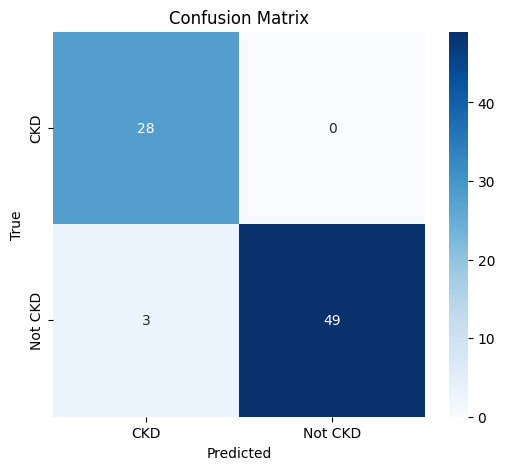

In [ ]:
# Melatih ulang model dengan seluruh data pelatihan
model.fit(X_train, y_train)

# --- 6. Prediksi ---
# Gunakan data uji (X_test) untuk evaluasi, jika ingin mengevaluasi performa model pada data yang tidak dilihat selama pelatihan
y_pred = model.predict(X_test)  # Gunakan X_test untuk prediksi

# --- 7. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)  # Evaluasi menggunakan y_test
cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix untuk data uji
report = classification_report(y_test, y_pred, zero_division=1)

# --- 8. Cetak hasil evaluasi ---
print(f"Akurasi pada data uji: {accuracy:.2f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# --- 9. Visualisasi Confusion Matrix ---
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['CKD', 'Not CKD'], yticklabels=['CKD', 'Not CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['rbc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['rbc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Akurasi Model SVM: 0.94
Confusion Matrix SVM:
 [[28  0]
 [ 5 47]]

Classification Report SVM:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.90      0.95        52

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



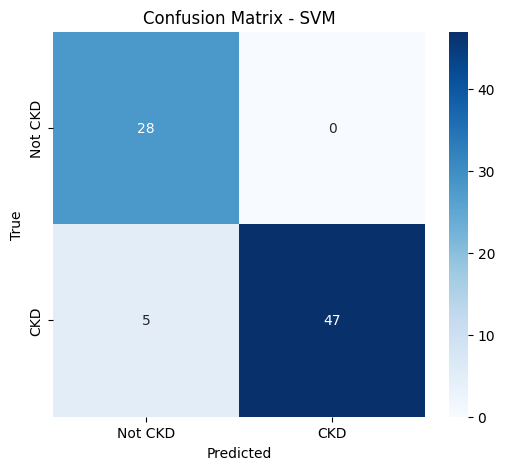

In [ ]:
from sklearn.impute import SimpleImputer

# Mengimputasi nilai NaN dengan median (bisa juga dengan 'mean' atau 'most_frequent' untuk kategorikal)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Melatih model SVM dengan data yang sudah diimputasi
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_imputed, y_train)

# Prediksi dan evaluasi
y_pred_svm = svm_model.predict(X_test_imputed)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Tampilkan hasil evaluasi
print(f"Akurasi Model SVM: {accuracy_svm:.2f}")
print("Confusion Matrix SVM:\n", cm_svm)
print("\nClassification Report SVM:\n", report_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
